In [1]:
# Compare ewma volatility with simple volatility

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [2]:
# Get data
start = '2015-12-30'
end = '2023-09-30'

# Get data from Yahoo Finance
# Ticker: ^GSPC
# S&P 500 Index

sp500 = yf.download('^GSPC', start, end, interval='1d')
sp500 = sp500[['Adj Close']]
sp500.columns = ['sp500']

# Calculate monthly returns from daily returns
sp500_monthly = sp500.resample('M').last()
sp500_monthly_returns = sp500_monthly['sp500'].pct_change().to_frame()

sp500_monthly_returns
type(sp500_monthly_returns)

[*********************100%%**********************]  1 of 1 completed


pandas.core.frame.DataFrame

,low_vol,high_vol,mixed
2010-12-31,NaN,NaN,NaN
2011-01-31,0.014967,0.025821,0.014967
2011-02-28,0.008617,-0.008188,0.008617
2011-03-31,0.016477,0.038056,0.016477
2011-04-30,0.025230,-0.018037,0.025230
...,...,...,...
2020-08-31,0.013015,0.022678,0.013015
2020-09-30,0.009653,-0.030503,0.009653
2020-10-31,-0.001687,0.013729,-0.001687
2020-11-30,0.021428,-0.003236,0.021428


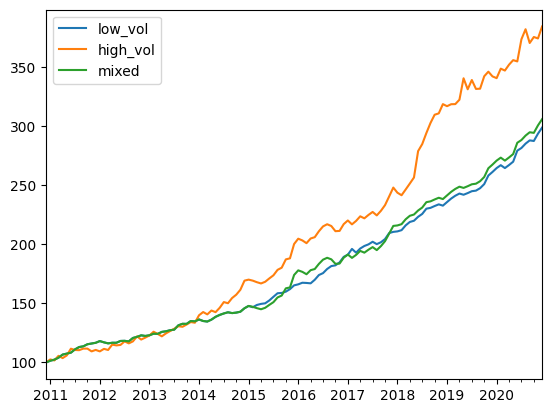

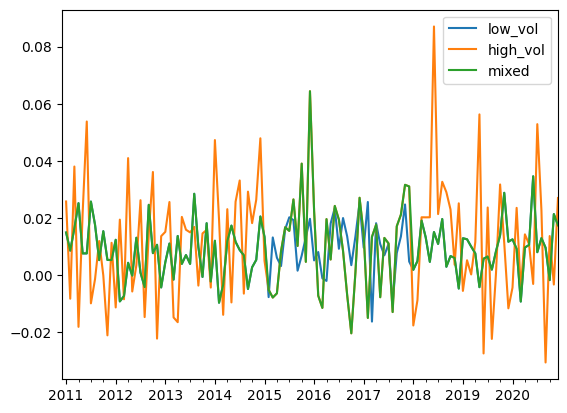

In [3]:
# generate a brownian motion time series with volatility of 0.01 and trend of 0.01
# Generate random numbers
np.random.seed(42)
random_returns = np.random.normal(0.01, 0.01, 120)
#another with volatility of 0.4 and trend of 0.01
random_returns2 = np.random.normal(0.01, 0.02, 120)
# random_returns3 = random_returns except between row 49 and 84, where it is random_returns2
random_returns3 = random_returns.copy()
random_returns3[49:84] = random_returns2[49:84]
# add 0 to the first row
random_returns = np.append(0, random_returns)
random_returns2 = np.append(0, random_returns2)
random_returns3 = np.append(0, random_returns3)




# compute the price series for these three random returns series rebased to 100 with cumprod. Make it a dataframe
assets_prices = pd.DataFrame({
                        'low_vol': 100*np.cumprod(1+random_returns),
                        'high_vol': 100*np.cumprod(1+random_returns2),
                        'mixed': 100*np.cumprod(1+random_returns3)})

# set the index to be a date range
start = '2010-12-31'
end = '2020-12-31'
assets_prices.index = pd.date_range(start, end, freq='M')

# compute returns from the price series
assets_returns = assets_prices.pct_change()


# plot the price series
assets_prices.plot()
assets_returns.plot()
assets_returns

In [4]:
#compute the annualized volatility of the three series in percent with pct symbol
assets_vol = assets_returns.std()*np.sqrt(12)*100
# add percent symbol
assets_vol_pct = assets_vol.apply(lambda x: str(round(x, 2)) + '%')
assets_vol_pct

low_vol     3.21%
high_vol    7.01%
mixed       4.18%
dtype: object

Text(0.5, 1.0, 'Rolling EWMA Volatility')

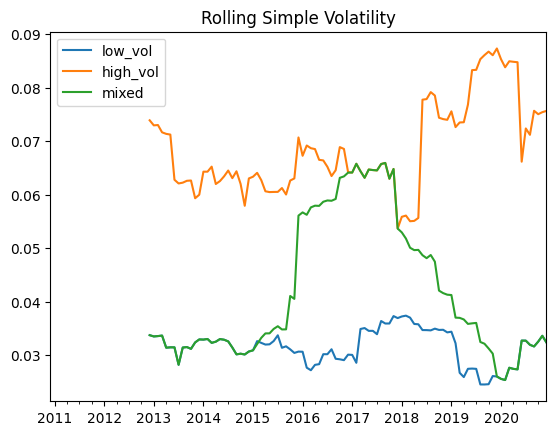

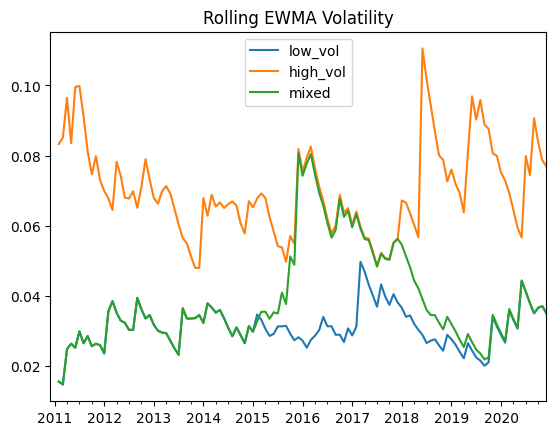

In [10]:
# compute the rolling annualized standard deviation of the returns with a window of 12
assets_rolling_vol = assets_returns.rolling(24).std()*np.sqrt(12)

# compute the exponentially weighted moving average of the returns with a span of 12
assets_rolling_vol_ewma = assets_returns.ewm(span=12).std()*np.sqrt(12)

# display rolling volatility and rolling ewma volatility in 2 separate plots
#in a first plot, plot the rolling volatility of the returns with a window of 12
#in a second plot, plot the exponentially weighted moving average of the returns with a span of 12
assets_rolling_vol.plot()
#title
plt.title('Rolling Simple Volatility')
assets_rolling_vol_ewma.plot()
#title
plt.title('Rolling EWMA Volatility')